In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.charts import Bar
import thinkstats2
import thinkplot
from scipy import stats
from livestockwatch.manualdata_utils import DataProvider
output_notebook()

[Errno 2] No such file or directory: 'logging.json'


/Users/fitram/anaconda/envs/livestockwatch/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Loading BokehJS ...

In [3]:
def ttest_onesided(high_vita, low_vita, confidence_interval, ttest_variant="welch"):
    # Welch’s t-test, independent variable
    high_vita_name, high_vita_dataset = high_vita
    low_vita_name, low_vita_dataset = low_vita
    
    if ttest_variant == "welch":
        tstat, pval = stats.ttest_ind(high_vita_dataset, low_vita_dataset, equal_var=False)
    elif ttest_variant == "student":
        tstat, pval = stats.ttest_rel(high_vita_dataset, low_vita_dataset)
        
    one_tailed_pval = pval/2
    
    pval_critical = 1 - (confidence_interval / 100)
    print("PVALUE = {} (P-Critical = {})".format(one_tailed_pval, pval_critical))
    print("Tstatistics = {}".format(tstat))
    if one_tailed_pval < pval_critical:
        print("PVALUE = {} (P-Critical = {})".format(one_tailed_pval, pval_critical))
        print("Tstatistics = {}".format(tstat))
        print("{} is significantly different than {}".format(high_vita_name, low_vita_name))
        if tstat > 0:
            print("{} > {}".format(high_vita_name, low_vita_name))
        elif tstat < 0:
            print("{} < {}".format(high_vita_name, low_vita_name))
    else:
        print("High group is not significantly different")

def calculate_iqr_limit(series):
    q1 = series.quantile(q=0.25)
    q2 = series.quantile(q=0.5)
    q3 = series.quantile(q=0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    print("upper limit = {}".format(upper))
    print("lower limit = {}".format(lower))
    return float(upper), float(lower)

def get_outlier(df, col_name):
    uplim, lowlim = calculate_iqr_limit(df[col_name])
    return df[(df[col_name] < lowlim) | df[col_name] > uplim]

In [4]:
ca_path = "ca.xlsx"
if not os.path.exists(ca_path):
    base_path = "/Volumes/fitramhd/BISE/WA02_month/"
    lst_excel_path = [
        os.path.join(base_path, "2015-7-data.xlsx"),
        os.path.join(base_path, "2015-6-data.xlsx"),
        os.path.join(base_path, "manual_data.xlsx")
    ]
    lst_ca_df = []

    data_provider = DataProvider(excel_result_path=ca_path)

    for excel_path in lst_excel_path:
        ca_df, _ = data_provider.process_excel_ca(excel_path)
        if not ca_df.empty:
            lst_ca_df.append(ca_df)

    lst_ca_df.append(data_provider.process_mongo_ca("livestockwatch", "cs1secfirstframe"))

    if lst_ca_df:
        data_provider.save_plr_data(lst_ca_df)

In [5]:
excel_handler = pd.ExcelFile("ca.xlsx")
excel_data = pd.read_excel(excel_handler, sheetname=None)
plr_df = excel_data["plr_all"]

(211, 27)

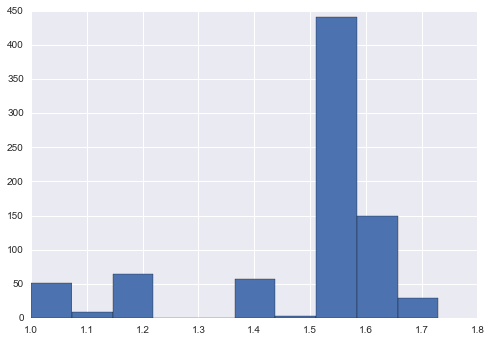

In [19]:
plr_df.frametime.hist()
# plr_df[plr_df.vit_a < 30].shape
plr_df[(plr_df.vit_a < 30) & (plr_df.same_region == True)].shape

# All region

HIGH VITA ALL REGION
count    21.000000
mean      0.375970
std       0.064430
min       0.253664
25%       0.320307
50%       0.376286
75%       0.423702
max       0.504791
Name: svg_ca, dtype: float64


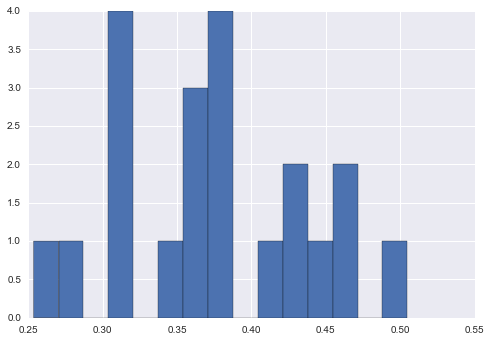

In [6]:
# HIGH VITA ALL REGION
hvar_df = plr_df[(plr_df.vit_a > 60) & (plr_df.same_region == False)]

# hvar_df = plr_df[(plr_df.vit_a > 60) & (plr_df.svg_ca > 0.5)]
print("HIGH VITA ALL REGION")
print(hvar_df.svg_ca.describe())
hvar_df.svg_ca.hist(bins=15)
# a = hvar_df[["cattle_id","cs_name","timestamp","svg_ca"]]
# a.sort(columns=["cattle_id", "timestamp"])
# # a[a.cattle_id==1445186816]
# a

upper limit = 0.5787934330194127
lower limit = 0.16521546937552123
HIGH VITA OUTLIER REMOVED
count    21.000000
mean      0.375970
std       0.064430
min       0.253664
25%       0.320307
50%       0.376286
75%       0.423702
max       0.504791
Name: svg_ca, dtype: float64
n = 21


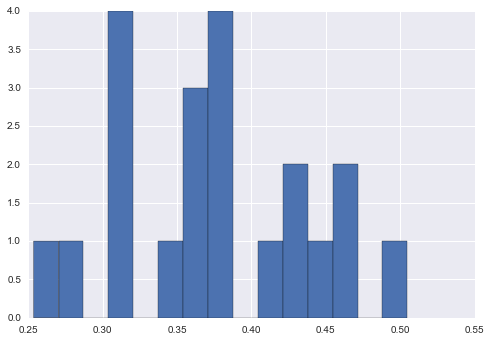

In [7]:
# HIGH VITA ALL REGION OUTLIER REMOVED
hvar_up_lim, hvar_low_lim = calculate_iqr_limit(hvar_df.svg_ca)
hvar_wo_df = hvar_df[(hvar_low_lim <= hvar_df.svg_ca) & (hvar_df.svg_ca <= hvar_up_lim)]
print("HIGH VITA OUTLIER REMOVED")
print(hvar_wo_df.svg_ca.describe())
hvar_wo_df.svg_ca.hist(bins=15)
print("n = {}".format(len(hvar_wo_df)))

In [8]:
hvar_outlier_df = get_outlier(hvar_df, "svg_ca")
# hvar_outlier_df[["cs_name", "svg_ca"]]

upper limit = 0.5787934330194127
lower limit = 0.16521546937552123


LOW VITA ALL REGION
count    25.000000
mean      0.366821
std       0.134000
min       0.096565
25%       0.285401
50%       0.346632
75%       0.466782
max       0.649408
Name: svg_ca, dtype: float64


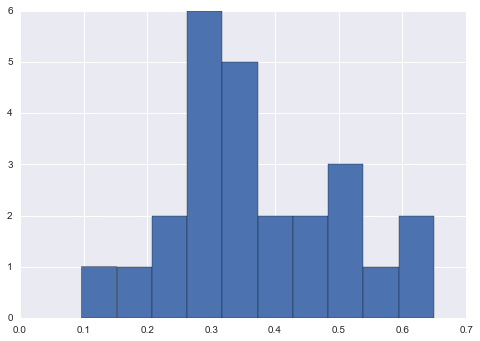

In [9]:
# LOW VITA ALL REGION
lvar_df = plr_df[(plr_df.vit_a < 30) & (plr_df.same_region == False)]

# lvar_df = plr_df[(plr_df.vit_a < 30) & (plr_df.svg_ca < 0.3)]
print("LOW VITA ALL REGION")
print(lvar_df.svg_ca.describe())
lvar_df.svg_ca.hist()

# a = lvar_df[["cattle_id","cs_name","timestamp","svg_ca"]]
# a.sort(columns=["cattle_id", "timestamp"])
# # a[a.cattle_id==1445186816]
# a
# from pymongo import MongoClient
# client = MongoClient()
# db = client['livestockwatch']
# collection = db['cs1secfirstframe']
# for cs_name in a.cs_name:
#     garbage = collection.delete_one({"cs_name": cs_name})
#     print(garbage)

upper limit = 0.7388530458377143
lower limit = 0.013330391971755562
LOW VITA ALL REGION OUTLIER REMOVED
count    25.000000
mean      0.366821
std       0.134000
min       0.096565
25%       0.285401
50%       0.346632
75%       0.466782
max       0.649408
Name: svg_ca, dtype: float64
n = 25


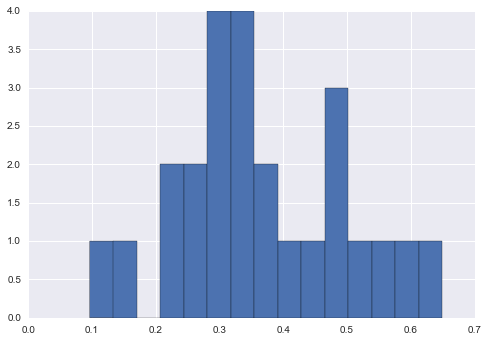

In [10]:
# LOW VITA ALL REGION OUTLIER REMOVED
lvar_up_lim, lvar_low_lim = calculate_iqr_limit(lvar_df.svg_ca)
lvar_wo_df = lvar_df[(lvar_low_lim <= lvar_df.svg_ca) & (lvar_df.svg_ca <= lvar_up_lim)]
print("LOW VITA ALL REGION OUTLIER REMOVED")
print(lvar_wo_df.svg_ca.describe())
lvar_wo_df.svg_ca.hist(bins=15)
print("n = {}".format(len(lvar_wo_df)))

21
count    21.000000
mean      0.375970
std       0.064430
min       0.253664
25%       0.320307
50%       0.376286
75%       0.423702
max       0.504791
Name: svg_ca, dtype: float64


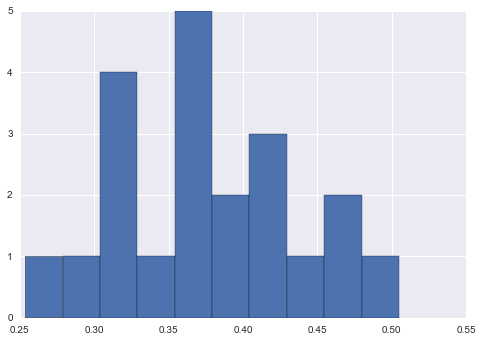

In [11]:
ca_high_RA = hvar_wo_df.svg_ca
print(ca_high_RA.shape[0])
print(ca_high_RA.describe())
ca_high_RA.hist()

25
count    25.000000
mean      0.366821
std       0.134000
min       0.096565
25%       0.285401
50%       0.346632
75%       0.466782
max       0.649408
Name: svg_ca, dtype: float64


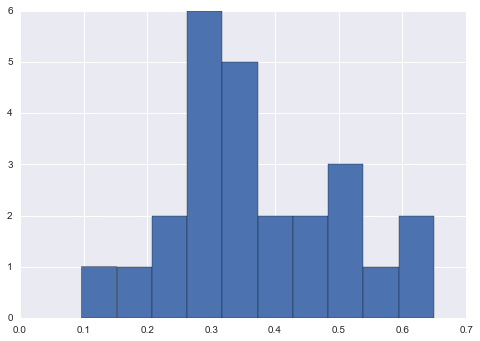

In [12]:
ca_low_RA_s = lvar_wo_df.svg_ca.sample(n=ca_high_RA.shape[0])
ca_low_RA = lvar_wo_df.svg_ca
ca_low_RA.hist()
print(ca_low_RA.shape[0])
print(ca_low_RA.describe())
# print(ca_low_RA)

## T-test dependent

In [13]:
ttest_onesided(("CA High all region",ca_high_RA), ("CA low all region",ca_low_RA_s), 95, ttest_variant="student")

High group is not significantly different


## Welch’s t-test, independent variable, 95 % confidence interval

In [17]:
ttest_onesided(("CA High all region",hvar_df.svg_ca), ("CA low all region",lvar_df.svg_ca), 95, ttest_variant="welch")

PVALUE = 0.3820863131519793 (P-Critical = 0.050000000000000044)
Tstatistics = 0.3023017196537523
High group is not significantly different


In [16]:
p = figure(width=800, height=500,  x_axis_label = "Vit A (IU/DL)",
       y_axis_label = "CA")
p.circle(lvar_wo_df.vit_a,lvar_wo_df.svg_ca, size=10, color="red", alpha=0.5, legend="Low vitamin A < 35")
p.triangle(hvar_wo_df.vit_a,hvar_wo_df.svg_ca, size=10, color="blue", alpha=0.5, legend="High vitamin A > 60")
show(p)

# Region 2

12
count    12.000000
mean      0.347247
std       0.053967
min       0.267239
25%       0.305392
50%       0.347043
75%       0.377101
max       0.428390
Name: svg_ca, dtype: float64


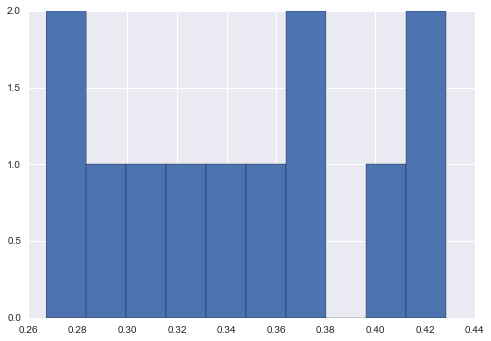

In [16]:
ca_high_R2 = hvar_wo_df.svg_ca[hvar_wo_df.region == 2]
print(ca_high_R2.shape[0])
print(ca_high_R2.describe())
ca_high_R2.hist()

52
count    52.000000
mean      0.324208
std       0.078522
min       0.162191
25%       0.255898
50%       0.326016
75%       0.376514
max       0.487775
Name: svg_ca, dtype: float64


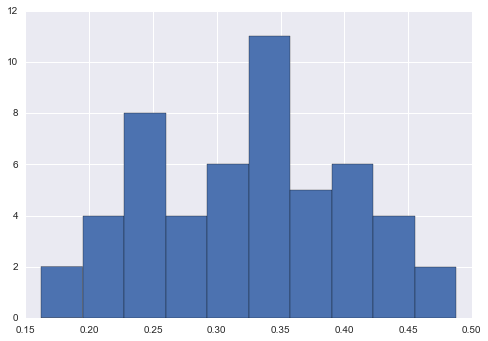

In [17]:
ca_low_R2 = lvar_wo_df.svg_ca[lvar_wo_df.region == 2]
ca_low_R2_s = ca_low_R2.sample(n=ca_high_R2.shape[0])
ca_low_R2.hist()
print(ca_low_R2.shape[0])
print(ca_low_R2.describe())
# print(ca_low_RA)

## T-test dependent

In [18]:
ttest_onesided(("CA High region 2",ca_high_R2), ("CA low region 2",ca_low_R2_s), 95, ttest_variant="student")

High group is not significantly different


## Welch’s t-test, independent variable, 95 % confidence interval

In [19]:
ttest_onesided(("CA High region 5",ca_high_R2), ("CA low region 5",ca_low_R2), 95)

High group is not significantly different


# Region 5

18
count    18.000000
mean      0.338048
std       0.047448
min       0.250714
25%       0.310294
50%       0.330551
75%       0.358961
max       0.443948
Name: svg_ca, dtype: float64


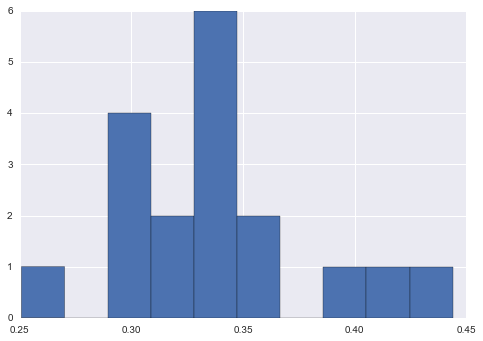

In [20]:
ca_high_R5 = hvar_wo_df.svg_ca[hvar_wo_df.region == 5]
print(ca_high_R5.shape[0])
print(ca_high_R5.describe())
ca_high_R5.hist()

73
count    73.000000
mean      0.304120
std       0.088947
min       0.104471
25%       0.255018
50%       0.301562
75%       0.348034
max       0.536388
Name: svg_ca, dtype: float64


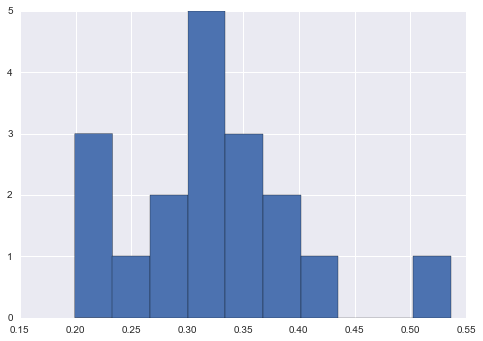

In [21]:
ca_low_R5 = lvar_wo_df.svg_ca[lvar_wo_df.region == 5]
ca_low_R5_s = ca_low_R5.sample(n=ca_high_R5.shape[0])
print(ca_low_R5.shape[0])
print(ca_low_R5.describe())
ca_low_R5_s.hist()

## T-test dependent

In [22]:
ttest_onesided(("CA High region 5",ca_high_R5), ("CA low region 5",ca_low_R5_s), 95, ttest_variant="student")

High group is not significantly different


## Welch’s t-test, independent variable, 95 % confidence interval

In [23]:
ttest_onesided(("CA High region 5",ca_high_R5), ("CA low region 5",ca_low_R5), 95)

PVALUE = 0.015456733136578065 (P-Critical = 0.050000000000000044)
Tstatistics = 2.2205516992926304
CA High region 5 is significantly different than CA low region 5
CA High region 5 > CA low region 5


# Region 6

16
count    16.000000
mean      0.339730
std       0.046857
min       0.253296
25%       0.315095
50%       0.339371
75%       0.358573
max       0.461242
Name: svg_ca, dtype: float64


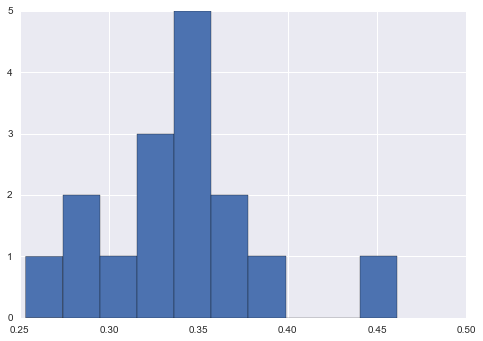

In [24]:
ca_high_R6 = hvar_wo_df.svg_ca[hvar_wo_df.region == 6]
print(ca_high_R6.shape[0])
print(ca_high_R6.describe())
ca_high_R6.hist()

48
count    48.000000
mean      0.328184
std       0.067263
min       0.115224
25%       0.290453
50%       0.329867
75%       0.366864
max       0.512846
Name: svg_ca, dtype: float64


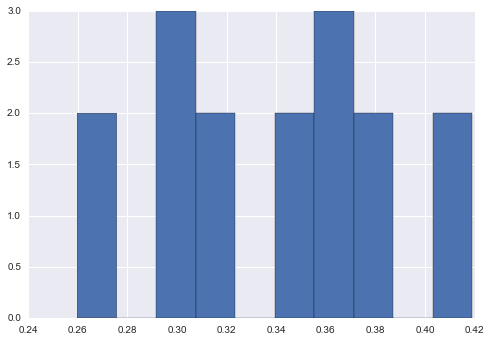

In [25]:
ca_low_R6 = lvar_wo_df.svg_ca[lvar_wo_df.region == 6]
ca_low_R6_s = ca_low_R6.sample(n=ca_high_R6.shape[0])
print(ca_low_R6.shape[0])
print(ca_low_R6.describe())
ca_low_R6_s.hist()

## T-test dependent

In [26]:
ttest_onesided(("CA High region 6",ca_high_R6), ("CA low region 6",ca_low_R6_s), 95, ttest_variant="student")

High group is not significantly different


## Welch’s t-test, independent variable, 95 % confidence interval

In [27]:
# Welch’s t-test, independent variable
ttest_onesided(("CA High region 6",ca_high_R6), ("CA low region 6",ca_low_R6), 95)

High group is not significantly different


In [28]:
a = hvar_df.groupby("same_region").describe()

In [29]:
a

angle          area  aspect_ratio     cattle_id  \
same_region                                                              
True        count  34.000000     61.000000      4.000000  7.400000e+01   
            mean    6.716820  23531.598171      1.299377  1.395809e+09   
            std    19.315096   5498.782701      0.262452  1.326686e+08   
            min     0.000000   8019.477980      0.910714  8.600537e+08   
            25%     0.000000  19784.017787      1.258213  1.372244e+09   
            50%     0.000000  23531.937945      1.405773  1.445174e+09   
            75%     0.000000  26848.926216      1.446937  1.445175e+09   
            max    67.653755  37400.115772      1.475248  1.445187e+09   

                   contour_area  contour_perimeter  distance    extent  \
same_region                                                              
True        count      4.000000           4.000000       0.0  4.000000   
            mean   11652.375000         491.515021       NaN  0.628032   
            std     4235.626112         110.491676       NaN  0.024846   
            min     6907.500000         365.320848       NaN  0.604648   
            25%     8683.125000         420.230751       NaN  0.613402   
            50%    12053.000000         494.646749       NaN  0.622643   
            75%    15022.250000         565.931020       NaN  0.637272   
            max    15596.000000         611.445739       NaN  0.662194   

                   firstframe  frametime     ...          max_area  \
same_region                                  ...                     
True        count        74.0  74.000000     ...         74.000000   
            mean          0.0   1.241757     ...      36650.457511   
            std           0.0   0.135872     ...       7005.613784   
            min           0.0   1.000000     ...      18464.027981   
            25%           0.0   1.200000     ...      32477.744063   
            50%           0.0   1.200000     ...      37238.880322   
            75%           0.0   1.200000     ...      40610.616068   
            max           0.0   1.600000     ...      55262.105810   

                   pupil_major_axis  pupil_minor_axis     region  solidity  \
same_region                                                                  
True        count         61.000000         61.000000  74.000000  4.000000   
            mean         214.707558        137.995422   4.189189  0.871739   
            std           21.431590         22.769311   1.458801  0.028322   
            min          137.113831         74.468903   1.000000  0.832009   
            25%          204.969000        121.023000   3.000000  0.865094   
            50%          215.021000        139.062000   4.000000  0.877973   
            75%          228.020000        153.985000   5.000000  0.884619   
            max          253.991000        188.979000   6.000000  0.899002   

                       svg_area     svg_ca    svg_ipr  svg_max_area  \
same_region                                                           
True        count     74.000000  74.000000  74.000000     68.000000   
            mean   23181.808076   0.362418   0.902599  36706.567341   
            std     5626.206407   0.077442   0.056010   6627.548831   
            min     7704.884815   0.250714   0.612341  18258.019918   
            25%    19594.905067   0.318339   0.869959  32702.363567   
            50%    23937.645832   0.339371   0.912059  37317.067772   
            75%    27004.737435   0.380056   0.938794  40251.800035   
            max    37773.923110   0.704899   0.984193  51550.137318   

                        vit_a  
same_region                    
True        count   74.000000  
            mean    86.665299  
            std     16.963816  
            min     60.208333  
            25%     71.877500  
            50%     85.858586  
            75%    105.556288  
            max    117.080000  

[8 rows x 21 columns]